/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wi

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00089D+00    |proj g|=  3.93041D-02

At iterate    5    f=  7.98657D+00    |proj g|=  1.04988D-03

At iterate   10    f=  7.98653D+00    |proj g|=  8.42295D-04

At iterate   15    f=  7.98638D+00    |proj g|=  3.46176D-03

At iterate   20    f=  7.96481D+00    |proj g|=  9.50463D-02

At iterate   25    f=  7.95100D+00    |proj g|=  1.85342D-04

At iterate   30    f=  7.95034D+00    |proj g|=  3.16841D-02

At iterate   35    f=  7.94740D+00    |proj g|=  3.19055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


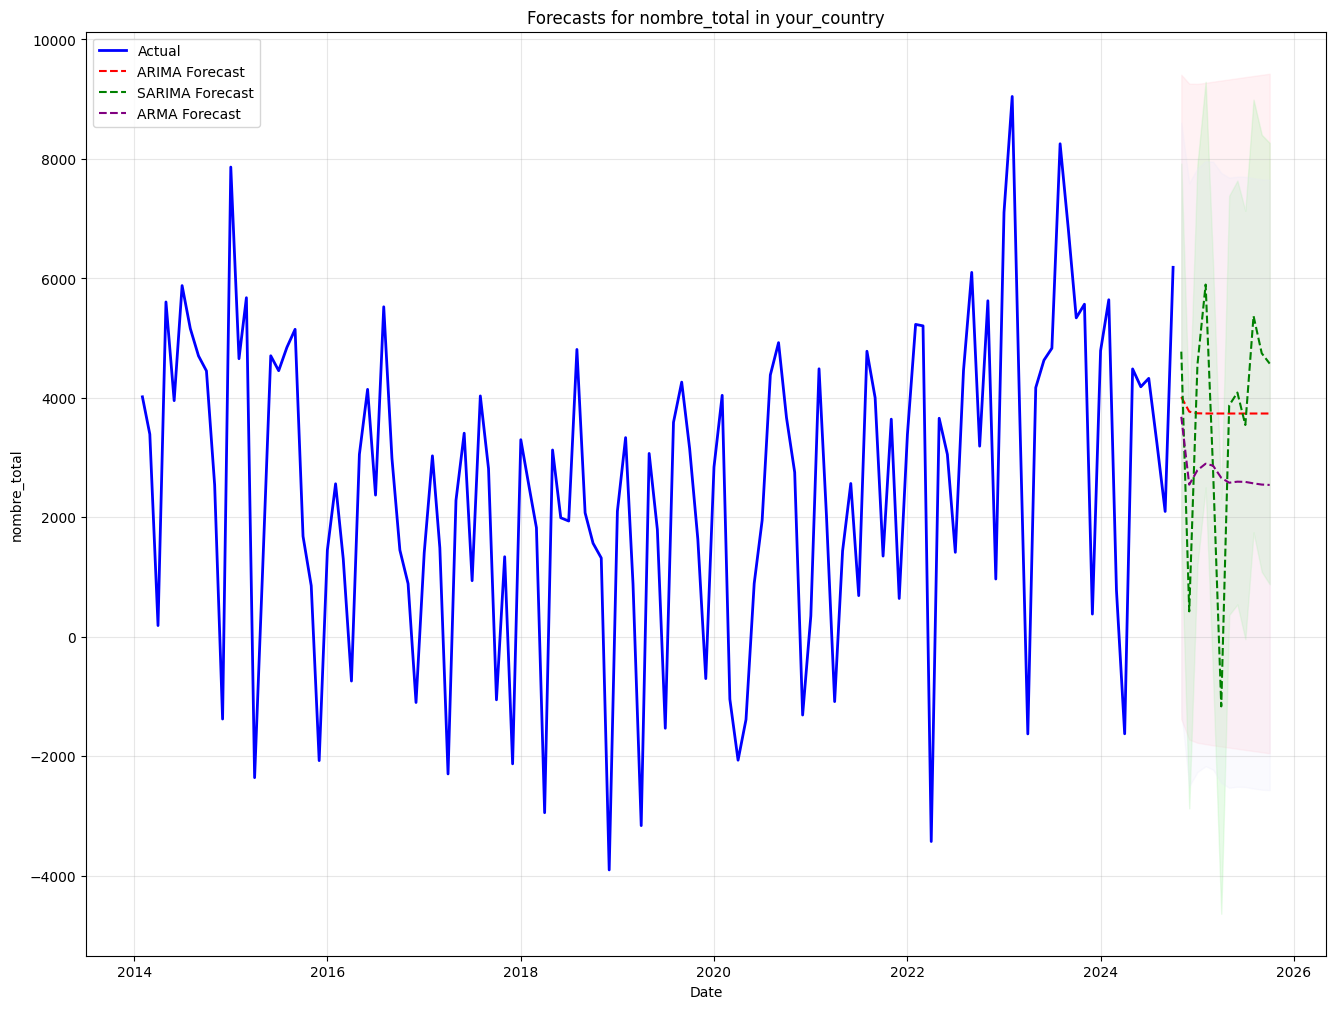

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df_country = df[df['pays'] == 'Total Europe']
# Set 'date' as index
df_country = df_country.set_index('date')
# Select the relevant column for modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']

# --- ARMA Model ---
# Fit the ARMA model
model_arma = ARIMA(data, order=(5, 0, 0))  # d=0 for ARMA
model_fit_arma = model_arma.fit()

# Forecast future values with ARMA
forecast_steps = 12  # Forecast for the next 12 months
forecast_arma = model_fit_arma.get_forecast(steps=forecast_steps)
forecast_ci_arma = forecast_arma.conf_int()

# --- ARIMA Model ---
# Fit the ARIMA model
model_arima = ARIMA(data, order=(1,1,1))  
model_fit_arima = model_arima.fit()

# Forecast future values with ARIMA

forecast_arima = model_fit_arima.get_forecast(steps=forecast_steps)
forecast_ci_arima = forecast_arima.conf_int()

# --- SARIMA Model ---
# Fit the SARIMA model
model_sarima = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()

# Forecast future values with SARIMA
forecast_sarima = model_fit_sarima.get_forecast(steps=forecast_steps)
forecast_ci_sarima = forecast_sarima.conf_int()

# --- Plotting ---
plt.figure(figsize=(16, 12))
plt.plot(data.index, data, label='Actual', color='blue', linewidth=2)

# Plot ARIMA forecast
plt.plot(forecast_arima.predicted_mean.index, forecast_arima.predicted_mean, label='ARIMA Forecast', color='red', linestyle='--')
plt.fill_between(forecast_ci_arima.index,
                 forecast_ci_arima.iloc[:, 0],
                 forecast_ci_arima.iloc[:, 1],
                 color='pink',
                 alpha=.2)

# Plot SARIMA forecast
plt.plot(forecast_sarima.predicted_mean.index, forecast_sarima.predicted_mean, label='SARIMA Forecast', color='green', linestyle='--')
plt.fill_between(forecast_ci_sarima.index,
                 forecast_ci_sarima.iloc[:, 0],
                 forecast_ci_sarima.iloc[:, 1],
                 color='lightgreen',
                 alpha=.2)

# Plot ARMA forecast
plt.plot(forecast_arma.predicted_mean.index, forecast_arma.predicted_mean, label='ARMA Forecast', color='purple', linestyle='--')
plt.fill_between(forecast_ci_arma.index,
                 forecast_ci_arma.iloc[:, 0],
                 forecast_ci_arma.iloc[:, 1],
                 color='lavender',
                 alpha=.2)

plt.title(f'Forecasts for nombre_total in your_country')
plt.xlabel('Date')
plt.ylabel('nombre_total')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS wi

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00089D+00    |proj g|=  3.93041D-02

At iterate    5    f=  7.98657D+00    |proj g|=  1.04988D-03

At iterate   10    f=  7.98653D+00    |proj g|=  8.42295D-04

At iterate   15    f=  7.98638D+00    |proj g|=  3.46176D-03

At iterate   20    f=  7.96481D+00    |proj g|=  9.50463D-02

At iterate   25    f=  7.95100D+00    |proj g|=  1.85342D-04

At iterate   30    f=  7.95034D+00    |proj g|=  3.16841D-02

At iterate   35    f=  7.94740D+00    |proj g|=  3.19055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/cyriltelley/Desktop/MSE/TSM-AnSeqDa/Project/TSM-AnSeqDa/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


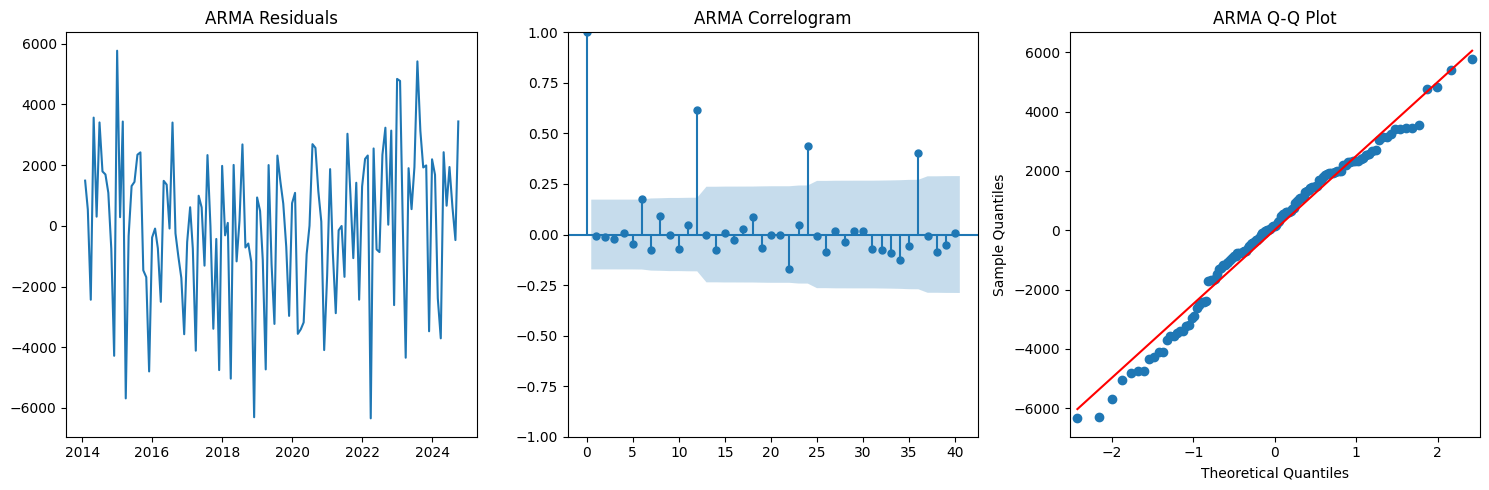

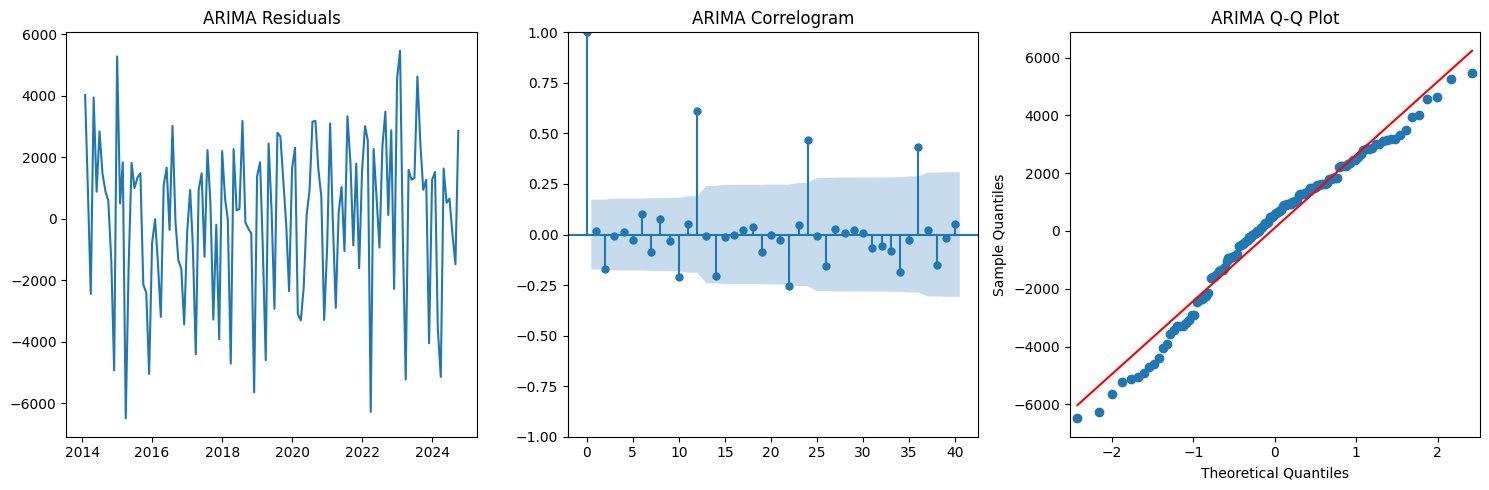

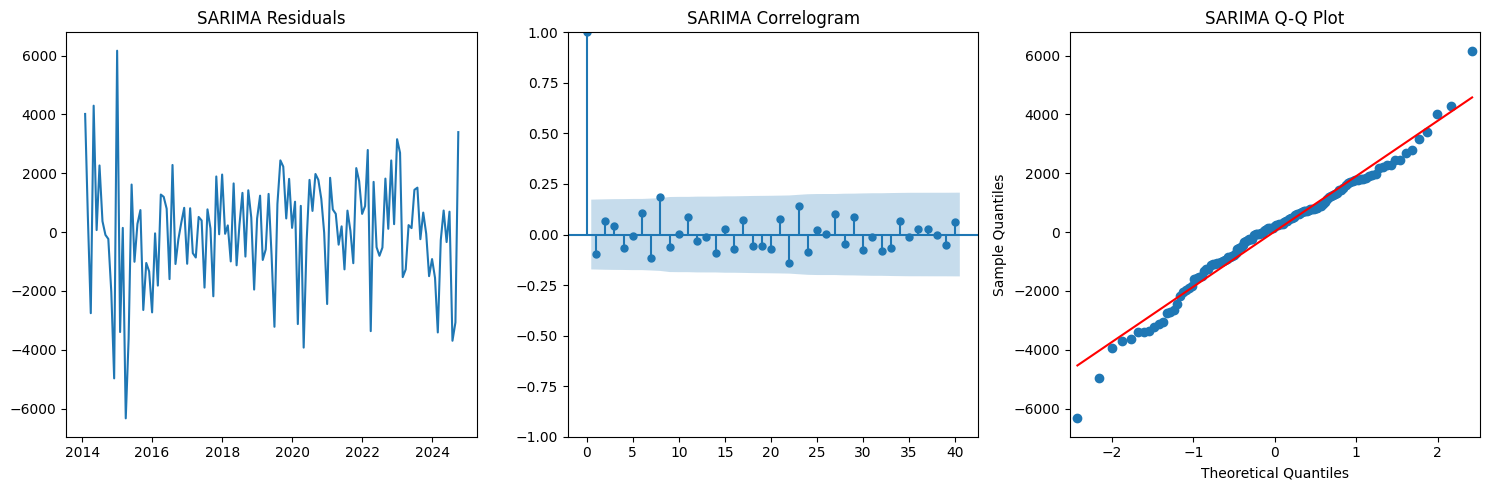

In [5]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your dataset
df = pd.read_csv("dataset_reformate2.csv") 
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])
df_country = df[df['pays'] == 'Total Europe']
# Set 'date' as index
df_country = df_country.set_index('date')
# Select the relevant column for modeling ('nombre_total' in this case)
data = df_country['entree_mensuelle']

# --- ARIMA Model ---
# Fit the ARIMA model
model_arima = ARIMA(data, order=(1,1,1))  
model_fit_arima = model_arima.fit()

# --- SARIMA Model ---
# Fit the SARIMA model
model_sarima = SARIMAX(data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit_sarima = model_sarima.fit()

# --- ARMA Model ---
# Fit the ARMA model
model_arma = ARIMA(data, order=(5, 0, 0))  # d=0 for ARMA
model_fit_arma = model_arma.fit()

# --- Diagnostic Plots ---
def diagnostic_plots(model_fit, model_name):
    """
    Creates diagnostic plots for the given model:
    - Residuals plot
    - Correlogram (ACF)
    - Q-Q plot
    """
    residuals = model_fit.resid
    fig, axes = plt.subplots(1, 3, figsize=(15,5))

    # Residuals plot
    axes[0].plot(residuals)
    axes[0].set_title(f'{model_name} Residuals')

    # Correlogram (ACF)
    sm.graphics.tsa.plot_acf(residuals, lags=40, ax=axes[1])
    axes[1].set_title(f'{model_name} Correlogram')

    # Q-Q plot
    sm.qqplot(residuals, line='s', ax=axes[2])
    axes[2].set_title(f'{model_name} Q-Q Plot')

    plt.tight_layout()
    plt.show()

# Generate diagnostic plots for ARMA
diagnostic_plots(model_fit_arma, "ARMA")
# Generate diagnostic plots for ARIMA
diagnostic_plots(model_fit_arima, "ARIMA")
# Generate diagnostic plots for SARIMA
diagnostic_plots(model_fit_sarima, "SARIMA")

